### DATA LOAD

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train.csv")
df.tail(3)

Id                                              Model  Price  Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  Color  Automatic    CC  Doors  Cylinders  Gears  Quarterly_Tax  \
1016  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500         71         10      1998  17016    Petrol   86          0   Blue          0  1300      3          4      5             69   
1017  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250         70         11      1998  16916    Petrol   86          1   Grey          0  1300      3          4      5             69   
1018  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950         76          5      1998      1    Petrol  110          0  Green          0  1600      5          4      5             19   

      Weight  Mfr_Guarantee  BOVAG_Guarantee  Guarantee_Period  ABS  Airbag_1  Airbag_2  Airco  Automatic_airco  Boardcomputer  CD_Player  Central_Lock  Powered_Windows  Power_Steering  Radio  \
1016    1015              0                1                 3    0         1         1      0                0              0          0             0                0               1      0   
1017    1015              1                1                 3    0         0         0      0                0              0          0             0                0               0      0   
1018    1114              0                0                 3    0         1         0      0                0              0          0             0                0               1      0   

      Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant  Tow_Bar  
1016          0            0                 1             0               0                  0        0  
1017          0            0                 1             0               0                  0        0  
1018          0            0                 0             0               0                  0        0

#### SPLIT DATAFRAME X AND Y
- dfy : number of features is 3
- dfX : number of features is 36

In [2]:
dfy = df.ix[:, :3]
dfX = df.ix[:, 3:]
print(len(dfy.columns), len(dfX.columns))

3 36


In [3]:
dfy.tail()

Id                                              Model  Price
1014  1434  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...   8950
1015  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500
1016  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500
1017  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250
1018  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950

In [4]:
# Fuel_Type, Color 제외됨
print(len(dfX.describe().columns))
dfX.describe()

34


Age_08_04    Mfg_Month     Mfg_Year             KM           HP    Met_Color    Automatic            CC        Doors  Cylinders        Gears  Quarterly_Tax       Weight  Mfr_Guarantee  \
count  1019.000000  1019.000000  1019.000000    1019.000000  1019.000000  1019.000000  1019.000000   1019.000000  1019.000000     1019.0  1019.000000    1019.000000  1019.000000    1019.000000   
mean     56.041217     5.480864  1999.623160   68177.927380   101.479882     0.669284     0.056919   1579.582924     4.044161        4.0     5.028459      86.405299  1072.262022       0.403337   
std      18.615283     3.304515     1.548589   37966.031948    14.811333     0.470702     0.231801    488.566949     0.954265        0.0     0.166363      39.276282    51.356826       0.490808   
min       1.000000     1.000000  1998.000000       1.000000    69.000000     0.000000     0.000000   1300.000000     2.000000        4.0     5.000000      19.000000  1000.000000       0.000000   
25%      44.000000     3.000000  1998.000000   41567.500000    86.000000     0.000000     0.000000   1400.000000     3.000000        4.0     5.000000      69.000000  1040.000000       0.000000   
50%      61.000000     5.000000  1999.000000   62280.000000   110.000000     1.000000     0.000000   1600.000000     4.000000        4.0     5.000000      85.000000  1070.000000       0.000000   
75%      70.000000     8.000000  2001.000000   86467.500000   110.000000     1.000000     0.000000   1600.000000     5.000000        4.0     5.000000      85.000000  1085.000000       1.000000   
max      80.000000    12.000000  2004.000000  243000.000000   192.000000     1.000000     1.000000  16000.000000     5.000000        4.0     6.000000     283.000000  1615.000000       1.000000   

       BOVAG_Guarantee  Guarantee_Period          ABS     Airbag_1     Airbag_2        Airco  Automatic_airco  Boardcomputer    CD_Player  Central_Lock  Powered_Windows  Power_Steering        Radio  \
count      1019.000000       1019.000000  1019.000000  1019.000000  1019.000000  1019.000000      1019.000000    1019.000000  1019.000000   1019.000000      1019.000000     1019.000000  1019.000000   
mean          0.887144          3.810599     0.813543     0.969578     0.717370     0.504416         0.059863       0.283611     0.226693      0.585868         0.567223        0.974485     0.142296   
std           0.316572          2.925809     0.389667     0.171830     0.450499     0.500226         0.237349       0.450972     0.418898      0.492813         0.495704        0.157761     0.349525   
min           0.000000          3.000000     0.000000     0.000000     0.000000     0.000000         0.000000       0.000000     0.000000      0.000000         0.000000        0.000000     0.000000   
25%           1.000000          3.000000     1.000000     1.000000     0.000000     0.000000         0.000000       0.000000     0.000000      0.000000         0.000000        1.000000     0.000000   
50%           1.000000          3.000000     1.000000     1.000000     1.000000     1.000000         0.000000       0.000000     0.000000      1.000000         1.000000        1.000000     0.000000   
75%           1.000000          3.000000     1.000000     1.000000     1.000000     1.000000         0.000000       1.000000     0.000000      1.000000         1.000000        1.000000     0.000000   
max           1.000000         36.000000     1.000000     1.000000     1.000000     1.000000         1.000000       1.000000     1.000000      1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant      Tow_Bar  
count  1019.000000  1019.000000       1019.000000   1019.000000     1019.000000        1019.000000  1019.000000  
mean      0.261040     0.312071          0.771344      0.196271        0.142296           0.002944     0.278705  
std       0.439417     0.463566          0.420173      0.397371        0.349525           0.

#### SPLIT DFX TO REAL AND CATEGORICAL VALUE
- dfX_real : number of features is 11
- dfX_cat : number of features is 25

In [5]:
# 11개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'CC', 'Doors', 
             'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']

In [6]:
# 25개 변수
cols_cat = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
           ]

In [7]:
dfX_real = dfX[cols_real]
print(len(dfX_real.columns))
dfX_real.tail()

11


Age_08_04  Mfg_Year     KM   HP    CC  Doors  Cylinders  Gears  Quarterly_Tax  Weight  Guarantee_Period
1014         71      1998  29000   86  1300      3          4      5             69    1045                 3
1015         69      1998  20544   86  1300      3          4      5             69    1025                 3
1016         71      1998  17016   86  1300      3          4      5             69    1015                 3
1017         70      1998  16916   86  1300      3          4      5             69    1015                 3
1018         76      1998      1  110  1600      5          4      5             19    1114                 3

In [8]:
dfX_cat = dfX[cols_cat]
print(len(dfX_cat.columns))
dfX_cat.tail()

25


Mfg_Month Fuel_Type  Met_Color  Color  Automatic  Mfr_Guarantee  BOVAG_Guarantee  ABS  Airbag_1  Airbag_2  Airco  Automatic_airco  Boardcomputer  CD_Player  Central_Lock  Powered_Windows  \
1014         10    Petrol          1   Blue          1              1                1    0         1         1      0                0              0          0             0                0   
1015         12    Petrol          1   Blue          0              1                1    1         1         1      1                0              0          0             1                1   
1016         10    Petrol          0   Blue          0              0                1    0         1         1      0                0              0          0             0                0   
1017         11    Petrol          1   Grey          0              1                1    0         0         0      0                0              0          0             0                0   
1018          5    Petrol          0  Green          0              0                0    0         1         0      0                0              0          0             0                0   

      Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant  Tow_Bar  
1014               1      0          0            0                 1             0               0                  0        0  
1015               1      0          1            1                 1             0               0                  0        0  
1016               1      0          0            0                 1             0               0                  0        0  
1017               0      0          0            0                 1             0               0                  0        0  
1018               1      0          0            0                 0             0               0                  0        0

---

### VISUALIZE DISTRIBUTION OF FEATURES ( 1 ) - REAL VARIABLES

In [9]:
# optional : matplotlib.pyplot style list
print(plt.style.available)

['seaborn-darkgrid', 'fivethirtyeight', 'classic', 'grayscale', 'seaborn-muted', 'seaborn-white', 'seaborn-colorblind', 'seaborn-deep', 'bmh', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-notebook', 'seaborn-bright', 'seaborn-dark', 'seaborn-whitegrid', 'ggplot', 'seaborn-talk', 'seaborn-paper', 'seaborn-pastel', 'dark_background', 'seaborn-poster']


In [10]:
for i in range(0, len(cols_real), 4):
    print("dfX{}".format(cols_real[i: i+4]))

dfX['Age_08_04', 'Mfg_Year', 'KM', 'HP']
dfX['CC', 'Doors', 'Cylinders', 'Gears']
dfX['Quarterly_Tax', 'Weight', 'Guarantee_Period']


#### dfX['Age_08_04', 'Mfg_Year', 'KM', 'HP']
- `'Age_08_04', 'Mfg_Year', 'KM', 'HP'` 변수 모두 사용할 수 있을 것으로 보임

In [11]:
# PairPlot 그려서 저장하기 ( output 출력시 버벅거려 끔 )

with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:4]]], axis=1) ,size=1.5)
    
    # 이 경우 모든 데이터 pairplot하여 오래걸림
    # sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX_real], axis=1), size=2)
    # sns_plot.savefig("pairplot-real-values.png")

#### dfX['CC', 'Doors', 'Cylinders', 'Gears']
- `'CC', 'Doors', 'Cylinders', 'Gears'` 변수 모두 사용할 수 없을 것으로 보임
- 오히려 이 변수들은 Category 변수에 속해보임

In [12]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[4:8]]], axis=1) ,size=1.5)

#### dfX['Quarterly_Tax', 'Weight', 'Guarantee_Period']
- `'Weight', 'Guarantee_Period'` 변수만 사용할 수 있을 것으로 보임

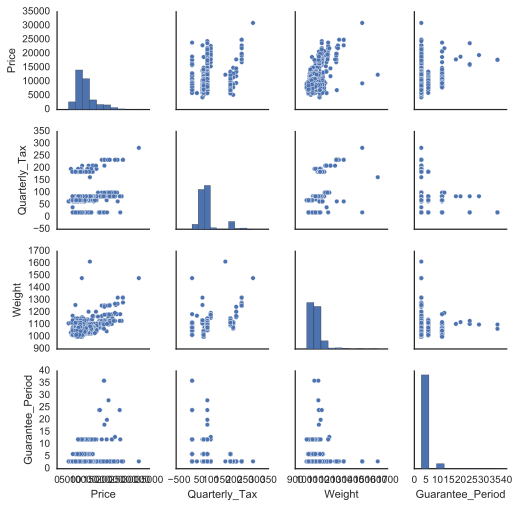

In [13]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[8:]]], axis=1) ,size=1.8)

#### FINDE USEFUL FEATURES IN REAL VARIABLES - 6 FEATURES
- 분석에 사용할 변수 ( REAL ) : `'Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Weight', 'Guarantee_Period'`
- 버릴 변수 or 범주형 변수 : `'CC', 'Doors', 'Cylinders', 'Gears'`
- 애매한 변수 : `'Quarterly_Tax'`

---

### VISUALIZE DISTRIBUTION OF FEATURES ( 2 ) - CATEGORICAL VARIABLES
- categorical variables list
- ['CC', 'Doors', 'Cylinders', 'Gears',
'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [14]:
# 'CC', 'Doors', 'Cylinders', 'Gears' 를 포함한 29개 변수
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
len(cols_cat)

29

#### DISPLAY BOXPLOT FOR ONLY ONE FEATURE

In [15]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")

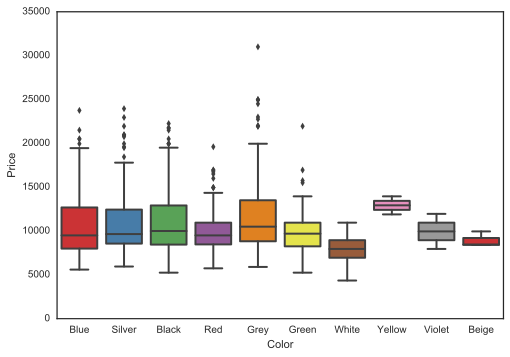

In [16]:
display_boxplot('Color')

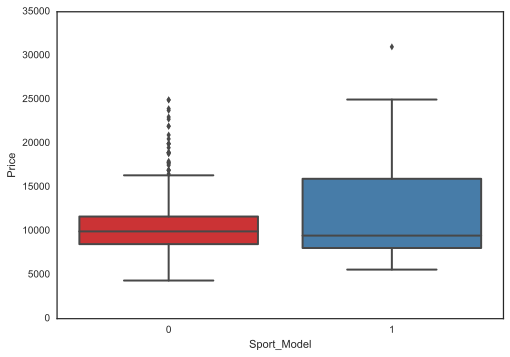

In [17]:
display_boxplot('Sport_Model')

#### DISPLAY MULTIPLE BOXPLOTS FOR MANY FEATRUES

In [18]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=dfX[cols_cat[start_idx + num]], y=dfy['Price'], palette="Set3", ax=ax)
            except:
                pass

#### 10 BOXPLOTS ( 1 )
- `['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee']`

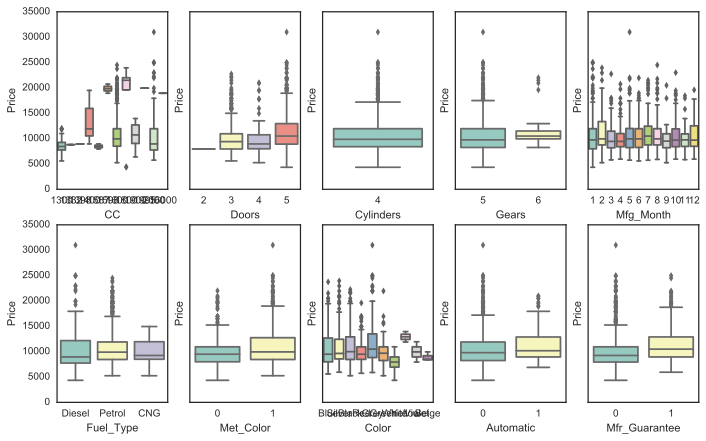

In [19]:
display_multi_boxplots('CC', 2, 5)

#### 10 BOXPLOTS ( 2 )
- `['BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows']`

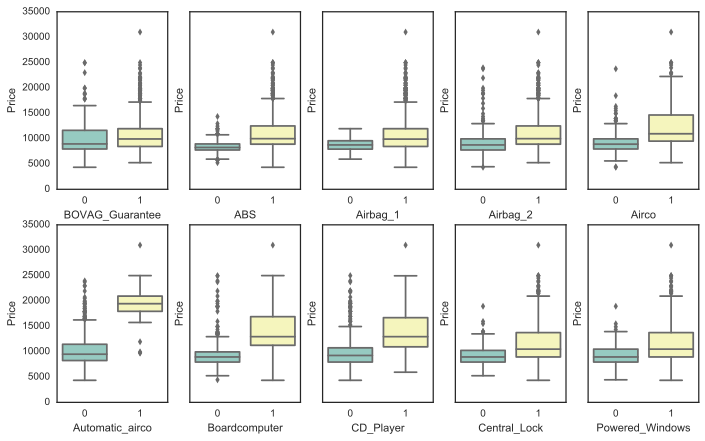

In [20]:
display_multi_boxplots('BOVAG_Guarantee', 2, 5)

#### 10 BOXPLOTS ( 3 )
- `['Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']`

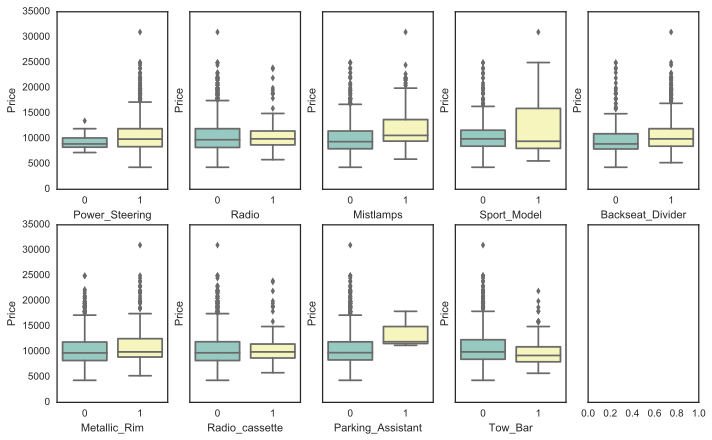

In [21]:
display_multi_boxplots('Power_Steering', 2, 5)